In [1]:
import numpy
import pandas
from src.data_objects import AllData
from src.functions import *
from src.readers import ReadDesign

retrain = True
runchain = True
logTrain = False

ThisData = AllData
ThisData["name"] = "epem-no-jets"

model_par = "input/epemDesign.txt"
outdir = "/data/rjfgroup/rjf01/cameron.parker/tunes/" + ThisData["name"] + "/"

(500, 46)
(500, 46)
(500, 39)
(500, 39)
(500, 29)
(500, 29)
(500, 26)
(500, 26)
(500, 36)
(500, 36)
(500, 26)
(500, 26)
(500, 22)
(500, 22)
(500, 63)
(500, 63)
(500, 58)
(500, 58)
(500, 49)
(500, 49)
(500, 12)
(500, 12)
(500, 12)
(500, 12)
(500, 12)
(500, 12)
(500, 58)
(500, 58)
(500, 53)
(500, 53)
(500, 51)
(500, 51)
(500, 33)
(500, 33)
(500, 32)
(500, 32)
(500, 31)
(500, 31)
(50, 46)
(50, 46)
(50, 39)
(50, 39)
(50, 29)
(50, 29)
(50, 26)
(50, 26)
(50, 36)
(50, 36)
(50, 26)
(50, 26)
(50, 22)
(50, 22)
(50, 63)
(50, 63)
(50, 58)
(50, 58)
(50, 49)
(50, 49)
(50, 12)
(50, 12)
(50, 12)
(50, 12)
(50, 12)
(50, 12)
(50, 58)
(50, 58)
(50, 53)
(50, 53)
(50, 51)
(50, 51)
(50, 33)
(50, 33)
(50, 32)
(50, 32)
(50, 31)
(50, 31)


Trimming points and obs ranges

In [2]:
del ThisData["Observables"]["PrPr2760"]
del ThisData["Observables"]["PrPr13000"]

del ThisData["Observables"]["EpEm91"]["jets"]
#del ThisData["Observables"]["EpEm91"]["charged-xp"]
#del ThisData["Observables"]["EpEm91"]["mult"]

#ThisData["Observables"]["EpEm91"]["charged-xp"]["cuts"].append(np.s_[::2])
#ThisData["Observables"]["EpEm91"]["pion-xp"]["cuts"].append(np.s_[::2])

ThisData["Design"] = ReadDesign("/data/rjfgroup/rjf01/cameron.parker/runs/LEPdesign/QVir_Analysis/parameters.txt")

trimRanges(ThisData)

In [3]:
badpoints = []
trimPoints(badpoints,ThisData)

Making Data pkl for selected observables

In [4]:
buildDataPkl(ThisData, logTrain)
print(ThisData["datapkl"])

Data sets being added to pkl:
EpEm91charged-xp
EpEm91pion-xp
EpEm91kaon-xp
EpEm91proton-xp
EpEm91mult
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/data.pkl


Getting emulators

In [5]:
from src.emulator_BAND import EmulatorBAND

setEmuPaths(ThisData)

if retrain:
    buildObsPkls(ThisData)
    trainEmulators(model_par, ThisData, logTrain)
else:
    readEmulators(ThisData)

[INFO][emulator_BAND] loading training data from /data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/EpEm91charged-xp.pkl ...
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator_BAND] Training dataset size: 500, discarded points: 0
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 500 training points ...
[INFO][emulator_BAND] loading training data from /data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/EpEm91pion-xp.pkl ...
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator_BAND] Training dataset size: 500, discarded points: 0
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 500 training points ...
[INFO][emulator_BAND] loading training data from /data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/EpEm91kaon-xp.pkl ...
[INFO][emulator_BAND] All training data are loaded.
[INFO][

Running Chain

In [6]:
from src.mcmc import Chain
import os

mcmcpath = "mcmc/" + ThisData["name"] + "-chain.pkl"
mymcmc = Chain(mcmc_path=mcmcpath, expdata_path=ThisData["datapkl"], model_parafile=model_par)
mymcmc.loadEmulator(getEmuPathList(ThisData))

[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/epem-no-jets-chain.pkl
[INFO][mcmc] Loading the model parameters space from input/epemDesign.txt ...
[INFO][mcmc] Run MCMC with emcee...
[INFO][mcmc] Loading the experiment data from /data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/data.pkl ...
[INFO][mcmc] Experimental dataset size: 140
Emulators being loaded:
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91charged-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91pion-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91kaon-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91proton-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91mult-emulator.sav
[INFO][mcmc] Number of Emulators: 5


In [7]:
os.environ["OMP_NUM_THREADS"] = "20"
# may have to: export RDMAV_FORK_SAFE=1 before running the code

n_effective=4000
n_active=2000
n_prior=8000
sample="tpcn"
n_max_steps=100
random_state=42

n_total = 25000
n_evidence = 0

pool = 20

if runchain:
    sampler = mymcmc.run_pocoMC(n_effective=n_effective, n_active=n_active,
                            n_prior=n_prior, sample=sample,
                            n_max_steps=n_max_steps, random_state=random_state,
                            n_total=n_total, n_evidence=n_evidence, pool=pool)

[INFO][mcmc] Generate the prior class for pocoMC ...
[INFO][mcmc] Starting pocoMC ...


Iter: 36it [34:37, 57.71s/it, beta=1, calls=348000, ESS=24718, logZ=208, logP=227, acc=0.653, steps=3, eff=1]        

[INFO][mcmc] Generate the posterior samples ...


[INFO][mcmc] Generate the evidence ...
Log evidence:  207.96405364269629
Log evidence error:  None
[INFO][mcmc] Writing pocoMC chains to file...


Corner Plot

['Q0', 'QSfactor', 'vir_factor', 'lambdaQCD', 'probStoUD', 'probQQtoQ']
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours


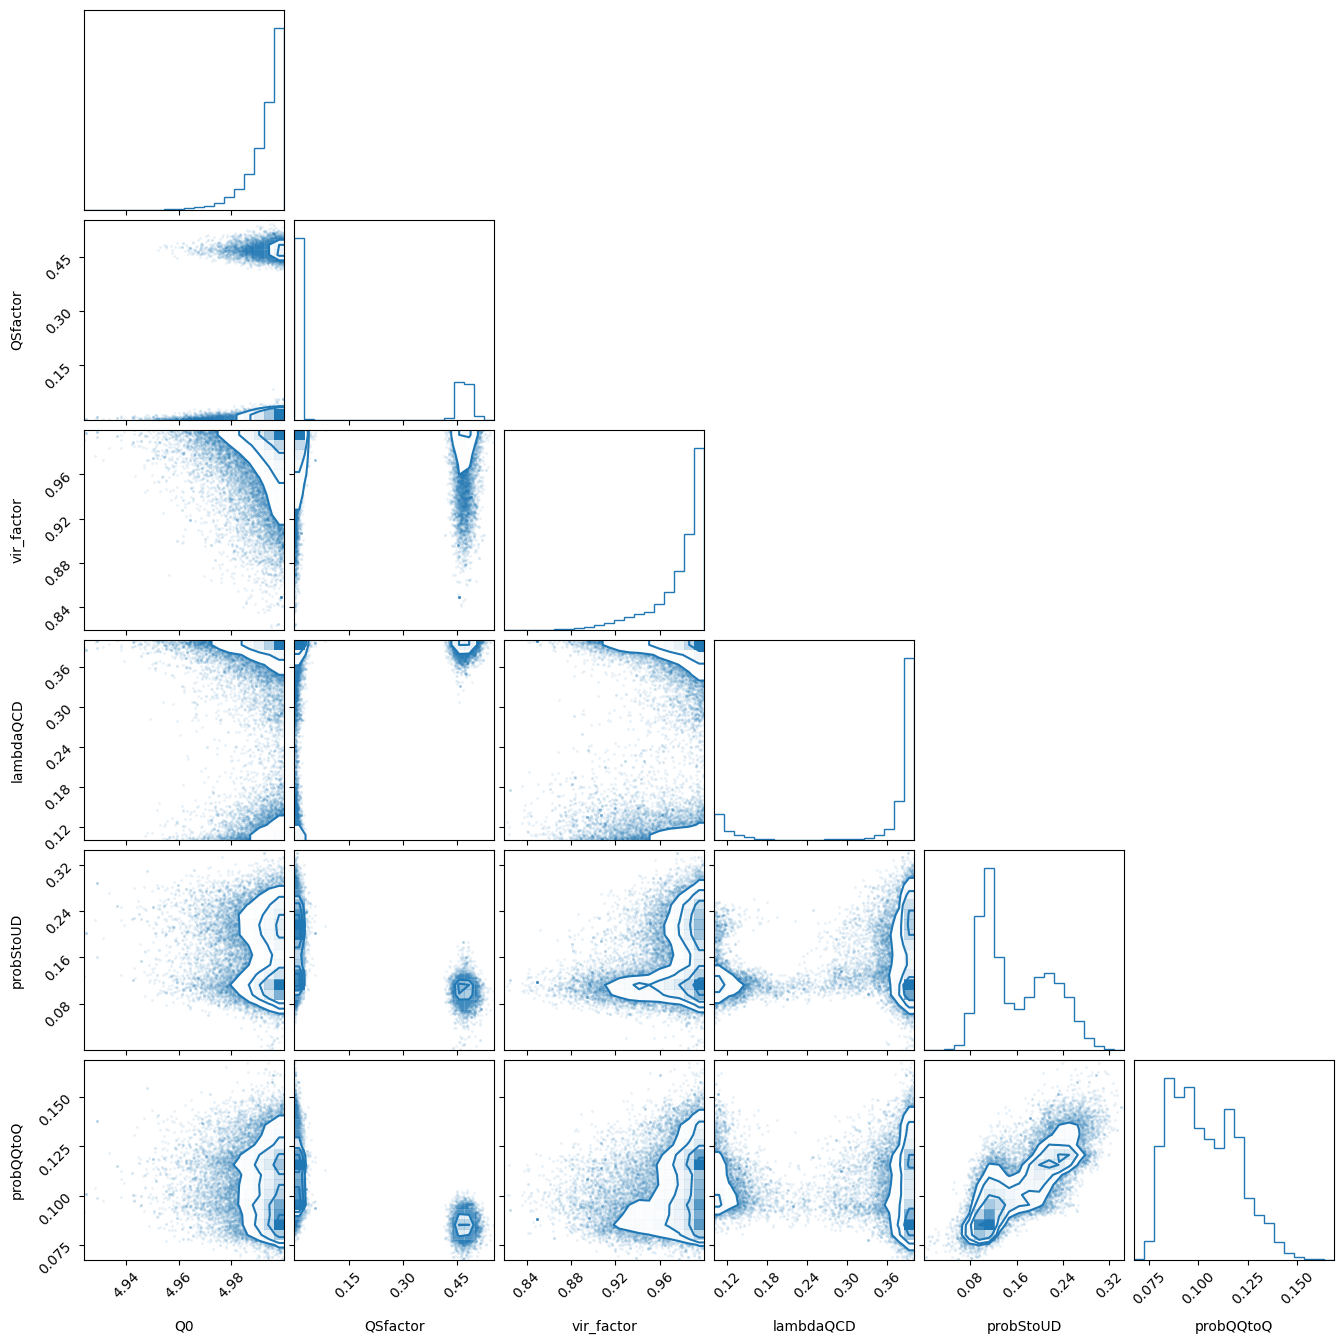

In [8]:
import pickle
import corner
import matplotlib.pyplot as plt
import numpy as np
        
with open(mcmcpath, 'rb') as pf:
        data = pickle.load(pf)

labels = mymcmc.label
print(labels)

fig = corner.corner(data['chain'], weights=data['weights'], labels=labels, color="C0")
plt.show()

[WARNING][core] Too few points to create valid contours
[WARNING][core] Too few points to create valid contours


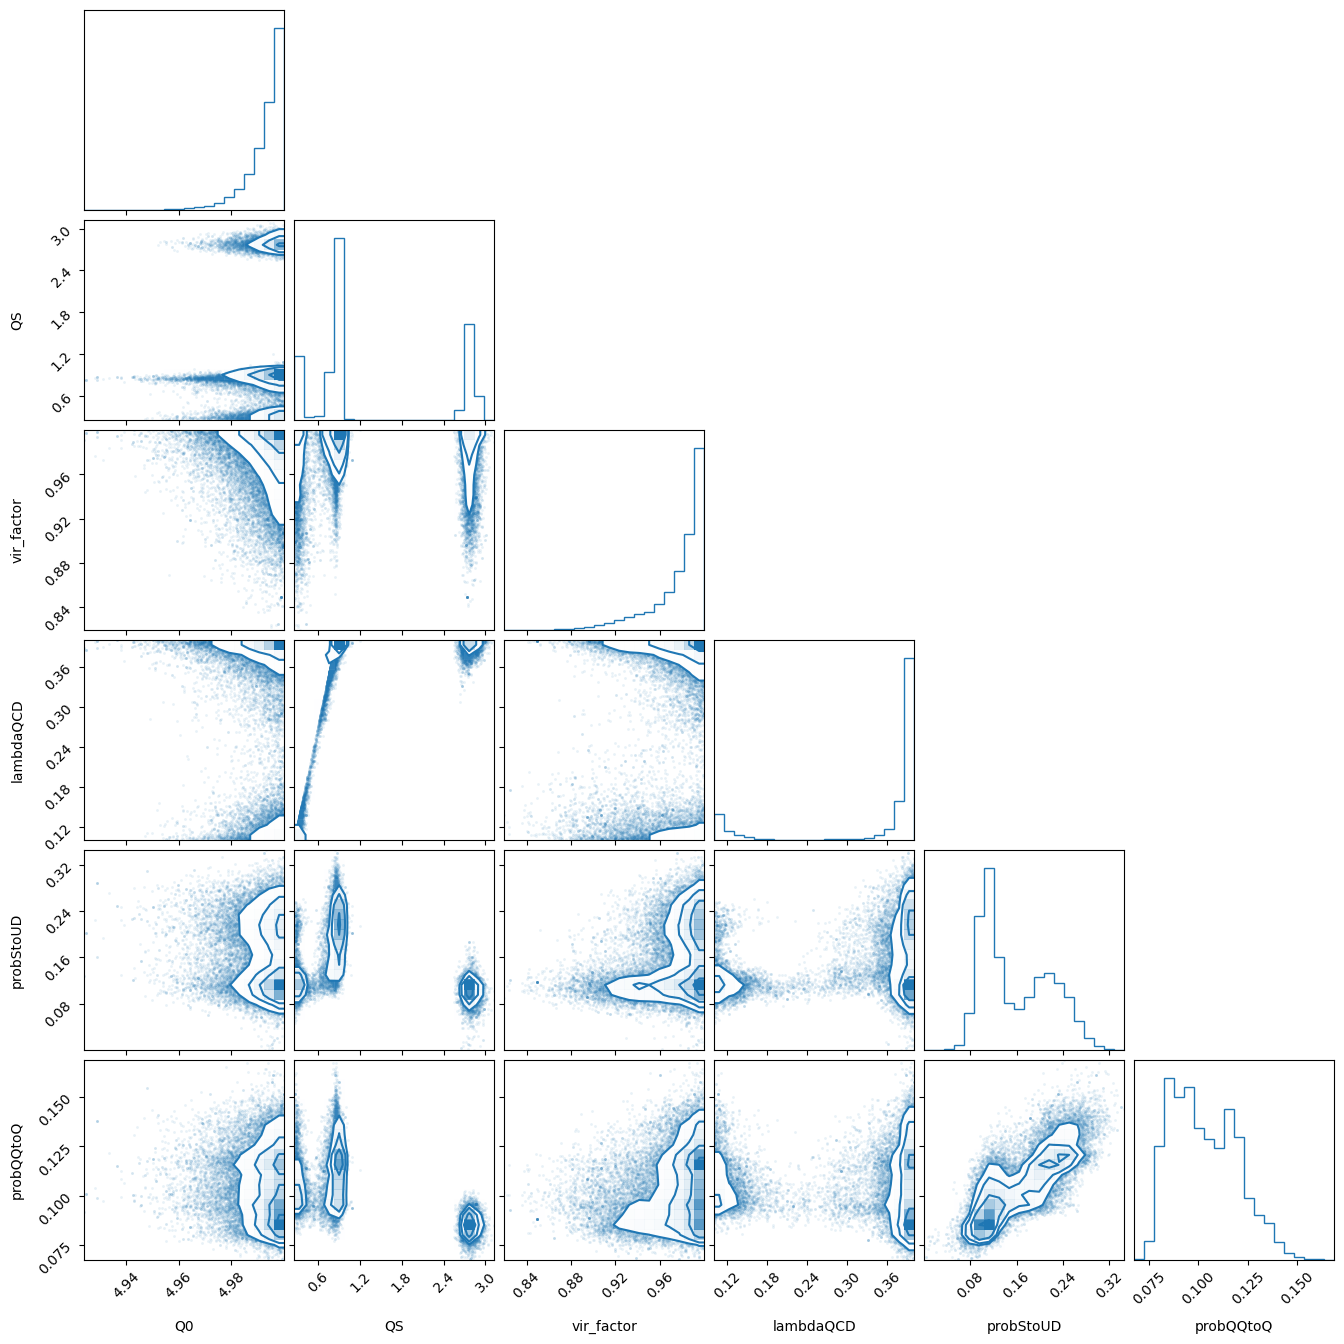

differential_evolution step 1: f(x)= 10.515
differential_evolution step 2: f(x)= -49.4066
differential_evolution step 3: f(x)= -49.4066
differential_evolution step 4: f(x)= -70.3796
differential_evolution step 5: f(x)= -163.694
differential_evolution step 6: f(x)= -163.694
differential_evolution step 7: f(x)= -165.8
differential_evolution step 8: f(x)= -165.8
differential_evolution step 9: f(x)= -177.186
differential_evolution step 10: f(x)= -177.186
differential_evolution step 11: f(x)= -200.79
differential_evolution step 12: f(x)= -200.79
differential_evolution step 13: f(x)= -200.79
differential_evolution step 14: f(x)= -200.79
differential_evolution step 15: f(x)= -200.79
differential_evolution step 16: f(x)= -201.829
differential_evolution step 17: f(x)= -211.659
differential_evolution step 18: f(x)= -211.659
differential_evolution step 19: f(x)= -217.873
differential_evolution step 20: f(x)= -217.873
differential_evolution step 21: f(x)= -217.873
differential_evolution step 22: f

In [9]:
TransformedSamples = np.copy(data['chain'])
TransformedSamples[:,0] = data['chain'][:,0]
TransformedSamples[:,1] = (2*data['chain'][:,3]+0.05) + (data['chain'][:,0]-(2*data['chain'][:,3]+0.05))*data['chain'][:,1]
TransformedSamples[:,2] = data['chain'][:,2]
TransformedSamples[:,3] = data['chain'][:,3]
TransformedSamples[:,4] = data['chain'][:,4]
TransformedSamples[:,5] = data['chain'][:,5]

labels[1] = "QS"
fig = corner.corner(TransformedSamples, weights=data['weights'], labels=labels, color="C0")
plt.show()
fig.savefig(outdir+'Corner.pdf', dpi = 192)

bestParams = ee_extract_parameters(mymcmc, ThisData["Design"]["Parameter"], outdir)

Priors

Making Priors...


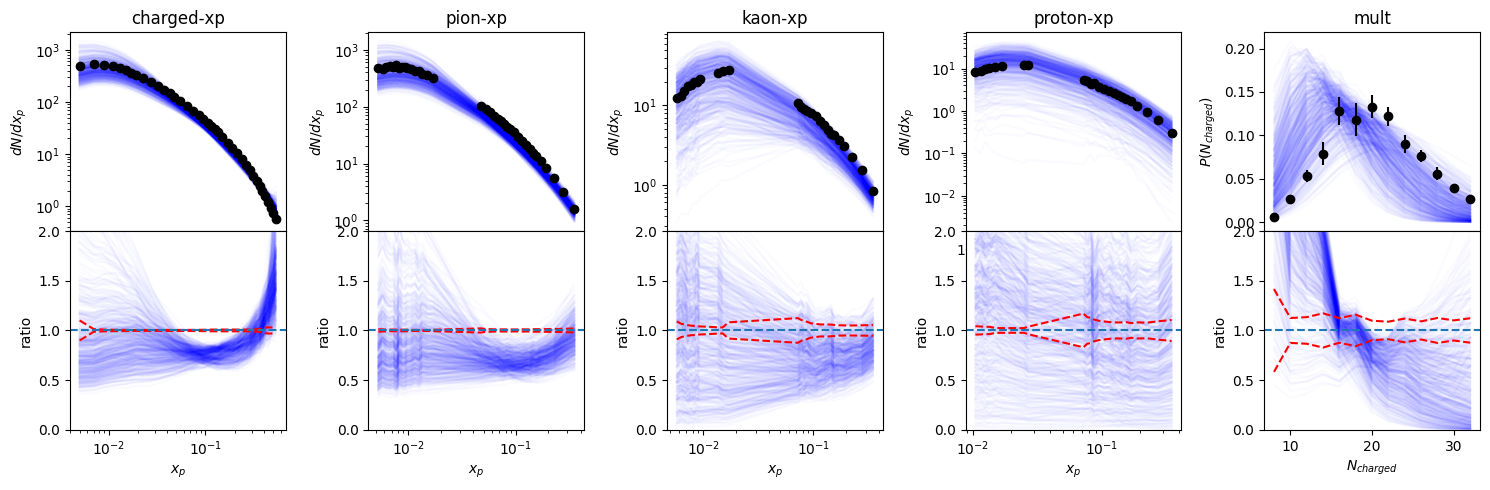

In [10]:
makeplot(ThisData, "Priors", outdir, logTrain=logTrain)

Posteriors

Making Posteriors...


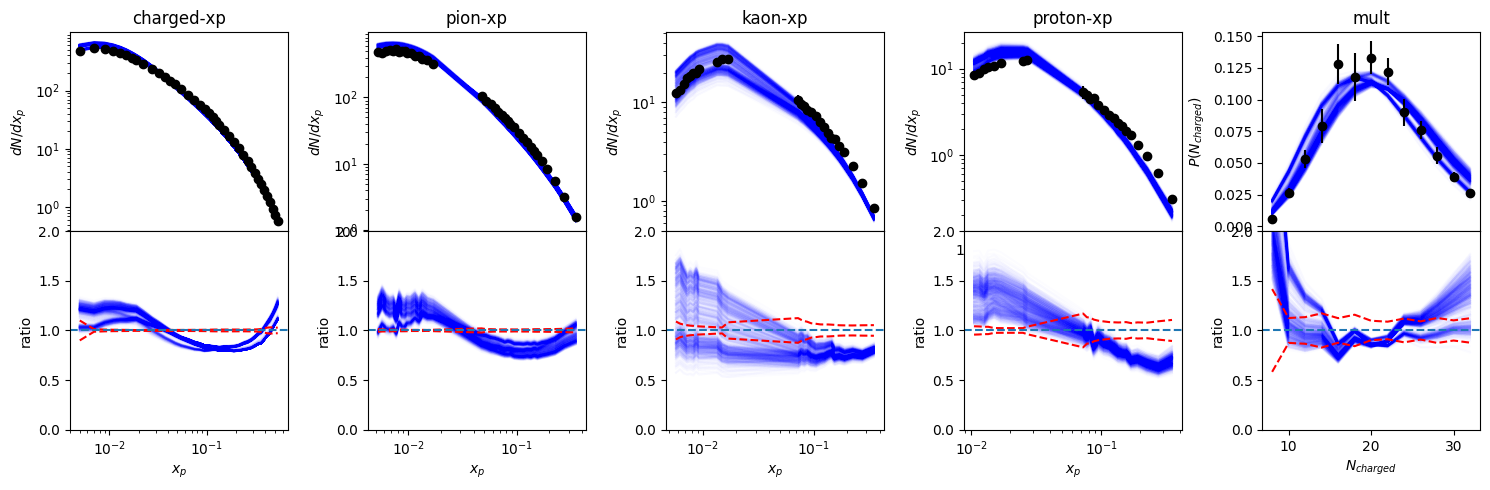

In [11]:
makeplot(ThisData, "Posteriors", outdir, samples=data["chain"], logTrain=logTrain)

Validation

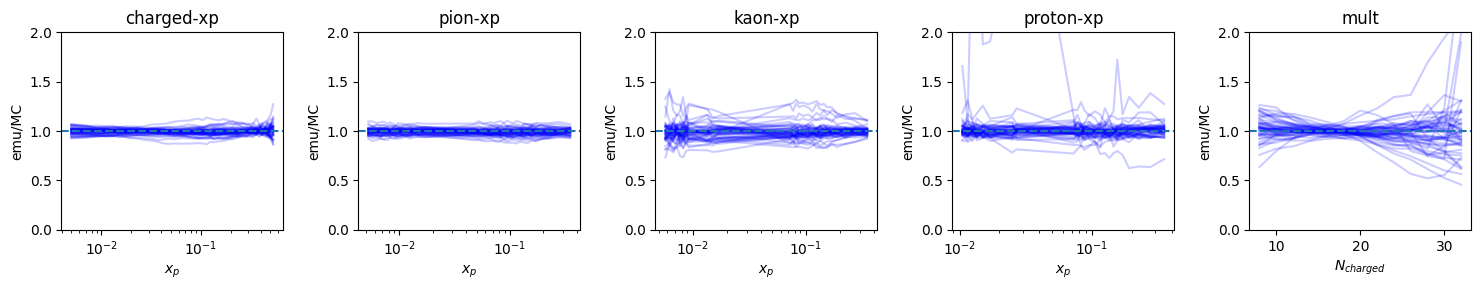

In [12]:
from src.data_objects import valData
valData["Design"] = ReadDesign("/data/rjfgroup/rjf01/cameron.parker/runs/validation/LEP/QVir_Analysis/parameters.txt")
updateCuts(ThisData,valData)
trimRanges(valData)
validationPlots(valData, ThisData, outdir, logTrain=logTrain)

Adding EpEm91charged-xp to closure data
Adding EpEm91pion-xp to closure data
Adding EpEm91kaon-xp to closure data
Adding EpEm91proton-xp to closure data
Adding EpEm91mult to closure data
[INFO][mcmc] Initializing MCMC ...
[INFO][mcmc] Final Markov Chain results will be saved in mcmc/epem-no-jets-closure.pkl
[INFO][mcmc] Loading the model parameters space from input/epemDesign.txt ...
[INFO][mcmc] Run MCMC with emcee...
[INFO][mcmc] Loading the experiment data from /data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/temp-pkls/epem-no-jets/closure.pkl ...
[INFO][mcmc] Experimental dataset size: 140
Emulators being loaded:
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91charged-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91pion-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/emulators/epem-no-jets/EpEm91kaon-xp-emulator.sav
/data/rjfgroup/rjf01/cameron.parker/builds/Bayes-Tune/e

[INFO][mcmc] Number of Emulators: 5
[INFO][mcmc] Generate the prior class for pocoMC ...
[INFO][mcmc] Starting pocoMC ...


Iter: 35it [30:40, 52.60s/it, beta=1, calls=286000, ESS=24364, logZ=415, logP=433, acc=0.743, steps=5, eff=1]            

[INFO][mcmc] Generate the posterior samples ...


[INFO][mcmc] Generate the evidence ...
Log evidence:  414.9687670953083
Log evidence error:  None
[INFO][mcmc] Writing pocoMC chains to file...


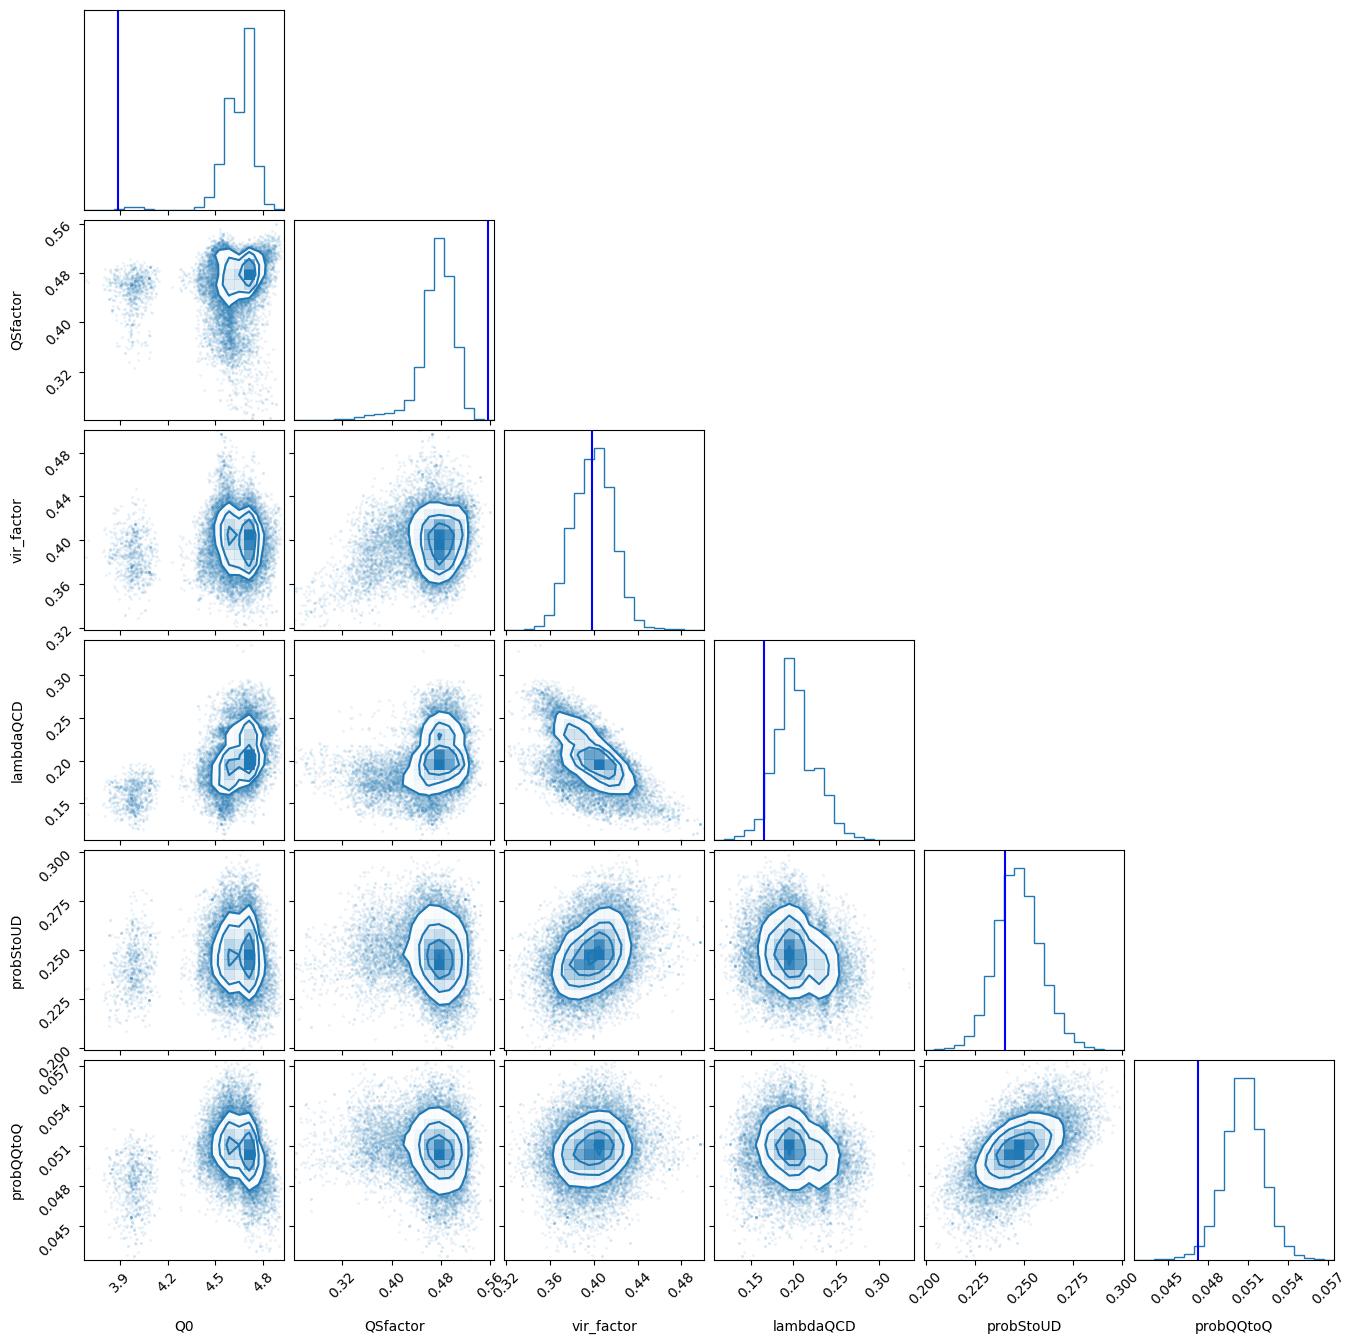

differential_evolution step 1: f(x)= -301.219
differential_evolution step 2: f(x)= -313.763
differential_evolution step 3: f(x)= -374.727
differential_evolution step 4: f(x)= -386.666
differential_evolution step 5: f(x)= -386.666
differential_evolution step 6: f(x)= -397.648
differential_evolution step 7: f(x)= -397.648
differential_evolution step 8: f(x)= -401.716
differential_evolution step 9: f(x)= -402.014
differential_evolution step 10: f(x)= -417.647
differential_evolution step 11: f(x)= -417.647
differential_evolution step 12: f(x)= -417.647
differential_evolution step 13: f(x)= -417.647
differential_evolution step 14: f(x)= -419.392
differential_evolution step 15: f(x)= -419.392
differential_evolution step 16: f(x)= -424.675
differential_evolution step 17: f(x)= -424.675
differential_evolution step 18: f(x)= -424.675
differential_evolution step 19: f(x)= -425.198
differential_evolution step 20: f(x)= -425.593
differential_evolution step 21: f(x)= -433.37
differential_evolution 

In [13]:
closureTest(ThisData, valData, outdir, model_par, runchain=runchain, logTrain=logTrain)